In [60]:
import numpy as np
import pandas as pd
import re


In [61]:
kcse_df = pd.read_csv("C:/Users/JWAITHIRA/Desktop/What_if_analysis/KCSE_2016.csv")

In [62]:
kcse_df.info()
kcse_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  21 non-null     object
 1   A       21 non-null     int64 
 2   A-      21 non-null     int64 
 3   B+      21 non-null     int64 
 4   B       21 non-null     int64 
 5   B-      21 non-null     int64 
 6   C+      21 non-null     int64 
 7   C       21 non-null     int64 
 8   C-      21 non-null     int64 
 9   D+      21 non-null     int64 
 10  D       21 non-null     int64 
 11  D-      21 non-null     int64 
 12  E       21 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.3+ KB


,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
0,FEMALE(2016),58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007
1,MALE(2016),83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322
2,ALL(2016),141,4645,10975,17216,23745,32207,44792,61026,80951,112135,149929,33399
3,MALE(2015),2024,7952,13517,19826,25312,29556,33437,37482,40181,40442,25531,3127
4,FEMALE(2015),661,4117,8410,13634,19269,25214,31476,36633,38976,39113,23127,2223


In [63]:
year = []
for i in kcse_df['Gender']:
    year.append(''.join(filter(lambda i: i.isdigit(), i)))
year    

kcse_df['Year'] = year

In [64]:
gender = []
for i in kcse_df['Gender']:
    gender.append("".join(re.split("[^a-zA-Z]*", i)))
gender

kcse_df['Gender']=gender
    
    

In [65]:
kcse_df.head(2)

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year
0,FEMALE,58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007,2016
1,MALE,83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322,2016


In [66]:
kcse_df.Gender.value_counts()

MALE      7
ALL       7
FEMALE    6
FEMLAE    1
Name: Gender, dtype: int64

In [67]:
kcse_df.set_index('Gender',inplace=True)


In [68]:
kcse_df.index[-2]

'FEMLAE'

In [69]:
kcse_df.rename({kcse_df.index[-2] : 'FEMALE'} , axis=0,inplace=True)

In [70]:
kcse_df.index.value_counts()

FEMALE    7
MALE      7
ALL       7
Name: Gender, dtype: int64

In [71]:
kcse_df.head(2)

,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year
Gender,,,,,,,,,,,,,
FEMALE,58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007,2016
MALE,83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322,2016


In [72]:
kcse_df_ch = kcse_df == kcse_df.shift(1) + kcse_df.shift(2)
kcse_df_ch

,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year
Gender,,,,,,,,,,,,,
FEMALE,False,False,False,False,False,False,False,False,False,False,False,False,False
MALE,False,False,False,False,False,False,False,False,False,False,False,False,False
ALL,True,True,True,True,True,True,True,True,True,True,True,False,False
MALE,False,False,False,False,False,False,False,False,False,False,False,False,False
FEMALE,False,False,False,False,False,False,False,False,False,False,False,False,False
ALL,True,True,True,True,True,True,True,True,True,True,True,True,False
MALE,False,False,False,False,False,False,False,False,False,False,False,False,False
FEMALE,False,False,False,False,False,False,False,False,False,False,False,False,False
ALL,True,True,True,True,True,True,True,True,True,True,True,True,False


In [73]:
ndf = pd.DataFrame()

for col in kcse_df:
    vals = []
    for i in range(kcse_df.shape[0]):
        
        if (i + 1) % 3 == 0:
            vals.append(kcse_df[col][i-1] + kcse_df[col][i-2])
        else:
            vals.append(kcse_df[col][i])
    ndf[col] = vals


ndf.index = kcse_df.index
ndf['Year'] = kcse_df['Year']
ndf
    
check = ndf.drop('Year', axis= 1) == ndf.drop('Year', axis= 1).shift(1) + ndf.drop('Year', axis= 1).shift(2)
check[check.index.str.startswith('ALL')].all().all()



True

In [74]:
kcse_df[kcse_df.index.str.startswith('ALL')].all(axis = 1)

Gender
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
ALL    True
dtype: bool

In [75]:
ndf

,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year
Gender,,,,,,,,,,,,,
FEMALE,58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007,2016
MALE,83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322,2016
ALL,141,4645,10975,17216,23745,32207,44792,61026,80951,112135,149929,33329,2016
MALE,2024,7952,13517,19826,25312,29556,33437,37482,40181,40442,25531,3127,2015
FEMALE,661,4117,8410,13634,19269,25214,31476,36633,38976,39113,23127,2223,2015
ALL,2685,12069,21927,33460,44581,54770,64913,74115,79157,79555,48658,5350,2015
MALE,148,638,1195,1627,2108,2569,2984,3299,3418,3291,2635,834,2006
FEMALE,69,242,446,772,1234,1873,2554,3193,3519,3513,2909,897,2006
ALL,217,880,1641,2399,3342,4442,5538,6492,6937,6804,5544,1731,2006


In [77]:
ndf.reset_index(inplace=True)

In [78]:
ndf_1=  ndf.groupby([ndf.Gender])[ndf.columns].sum()
ndf_1

,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
Gender,,,,,,,,,,,,
ALL,3846,21402,42704,65332,88485,113551,142676,173291,200894,231989,232101,49927
FEMALE,1059,8071,17803,28567,40355,53664,69654,86247,101168,117276,118180,25923
MALE,2787,13331,24901,36765,48130,59887,73022,87044,99726,114713,113921,24004


In [79]:
ndf_1["sum"] = ndf_1.sum(axis=1)

In [80]:
ndf_1.head()

,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,sum
Gender,,,,,,,,,,,,,
ALL,3846,21402,42704,65332,88485,113551,142676,173291,200894,231989,232101,49927,1366198
FEMALE,1059,8071,17803,28567,40355,53664,69654,86247,101168,117276,118180,25923,667967
MALE,2787,13331,24901,36765,48130,59887,73022,87044,99726,114713,113921,24004,698231


Total number of ALL students =  1366198  

Total no. of FEMALE students =  667967  

Total no. of MALE students = 698231 (higher)

## Visualizations

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'TOTAL NUMBERS PRESENT IN THE DATASET')]

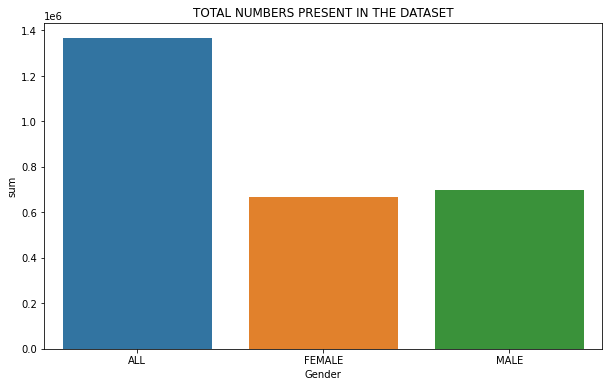

In [101]:
figure = plt.figure(figsize = (10,6))
figure
sns.barplot(x=ndf_1.index,y='sum',data=ndf_1 ).set(title='TOTAL NUMBERS PRESENT IN THE DATASET')


In [82]:
ndf.head(6)

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year
0,FEMALE,58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007,2016
1,MALE,83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322,2016
2,ALL,141,4645,10975,17216,23745,32207,44792,61026,80951,112135,149929,33329,2016
3,MALE,2024,7952,13517,19826,25312,29556,33437,37482,40181,40442,25531,3127,2015
4,FEMALE,661,4117,8410,13634,19269,25214,31476,36633,38976,39113,23127,2223,2015
5,ALL,2685,12069,21927,33460,44581,54770,64913,74115,79157,79555,48658,5350,2015


In [83]:
# figure = plt.figure(figsize = (10,6))
# sns.countplot('Gender',hue='A',data=ndf)

<AxesSubplot:xlabel='Gender', ylabel='E'>

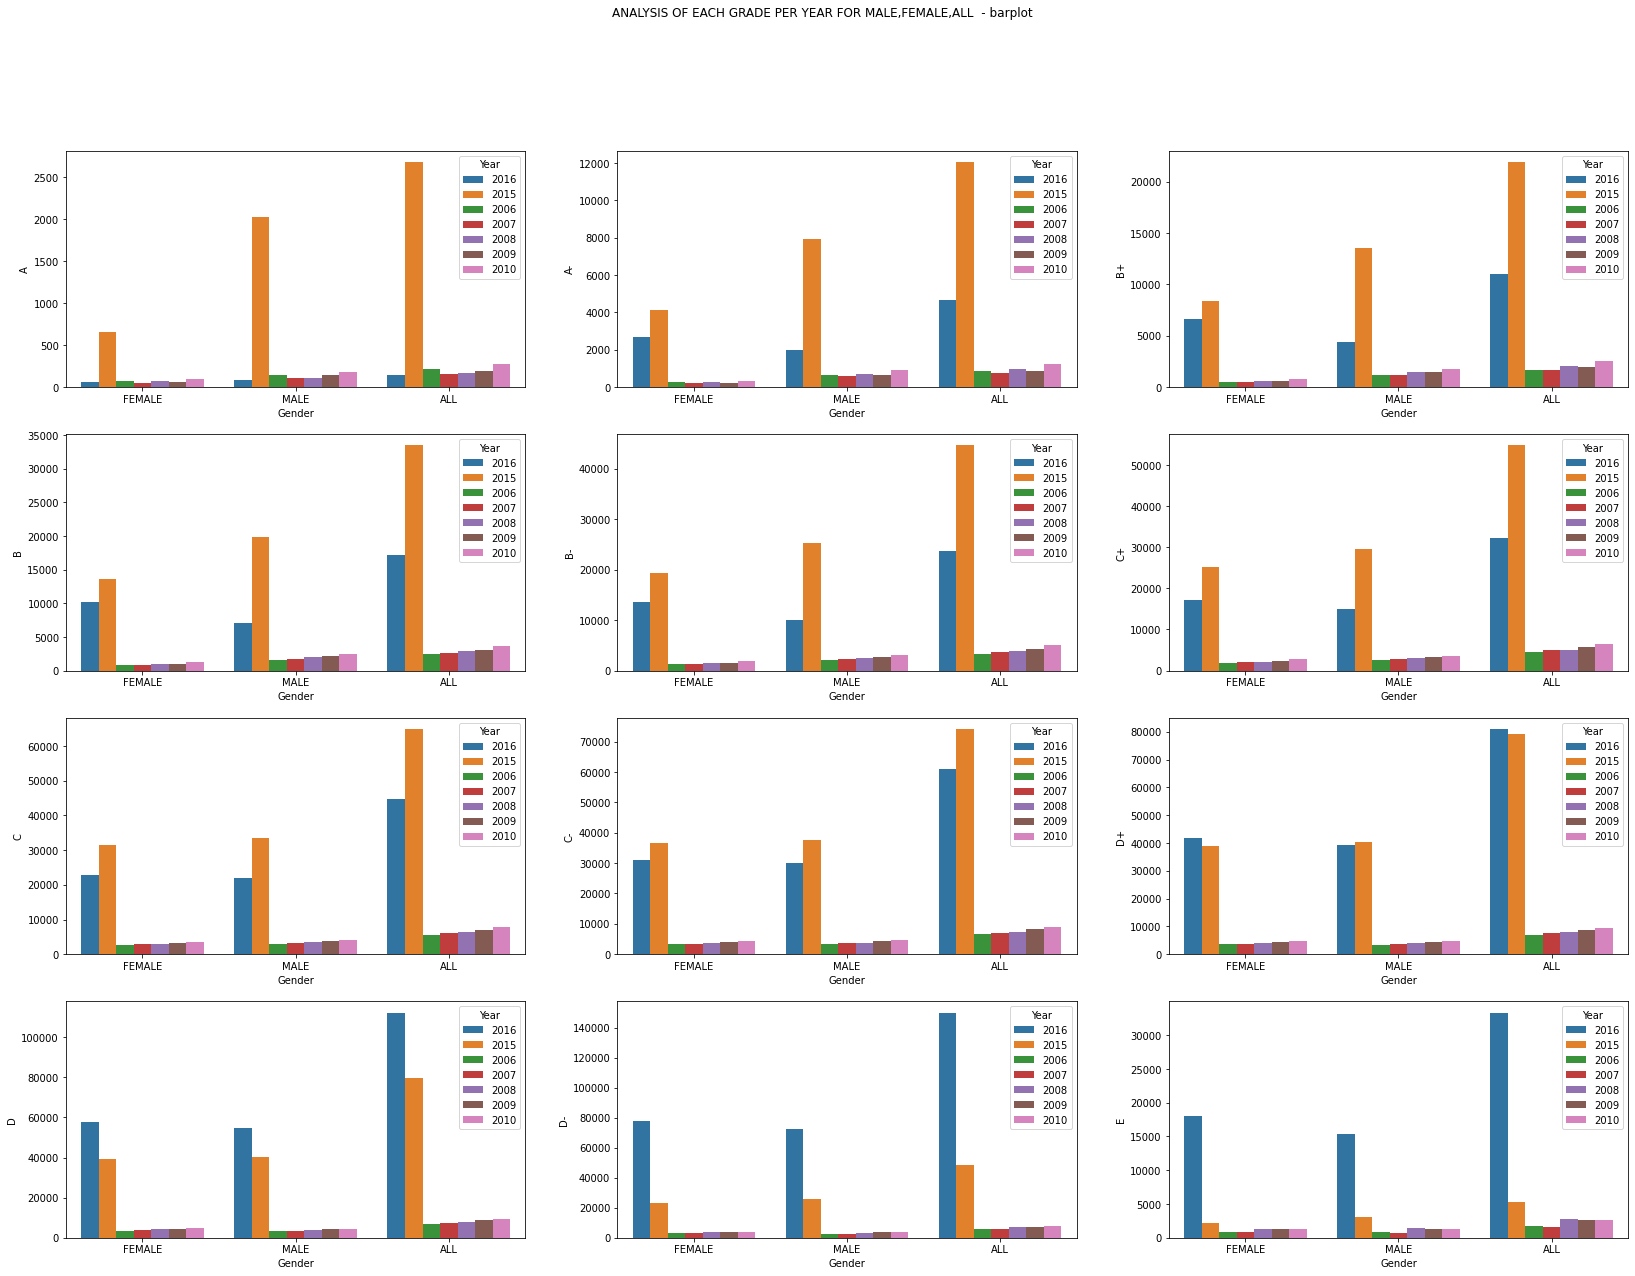

In [90]:
fig, axes = plt.subplots(4, 3, figsize=(28, 20))

fig.suptitle('ANALYSIS OF EACH GRADE PER YEAR FOR MALE,FEMALE,ALL  - barplot')


sns.barplot(ax=axes[0, 0],x='Gender',y='A',data=ndf , hue = 'Year')
sns.barplot(ax=axes[0, 1],x='Gender',y='A-',data=ndf , hue = 'Year')
sns.barplot(ax=axes[0, 2],x='Gender',y='B+',data=ndf , hue = 'Year')
sns.barplot(ax=axes[1, 0],x='Gender',y='B',data=ndf , hue = 'Year')
sns.barplot(ax=axes[1, 1],x='Gender',y='B-',data=ndf , hue = 'Year')
sns.barplot(ax=axes[1, 2],x='Gender',y='C+',data=ndf , hue = 'Year')
sns.barplot(ax=axes[2, 0],x='Gender',y='C',data=ndf , hue = 'Year')
sns.barplot(ax=axes[2, 1],x='Gender',y='C-',data=ndf , hue = 'Year')
sns.barplot(ax=axes[2, 2],x='Gender',y='D+',data=ndf , hue = 'Year')
sns.barplot(ax=axes[3, 0],x='Gender',y='D',data=ndf , hue = 'Year')
sns.barplot(ax=axes[3, 1],x='Gender',y='D-',data=ndf , hue = 'Year')
sns.barplot(ax=axes[3, 2],x='Gender',y='E',data=ndf , hue = 'Year')




<AxesSubplot:xlabel='Gender', ylabel='E'>

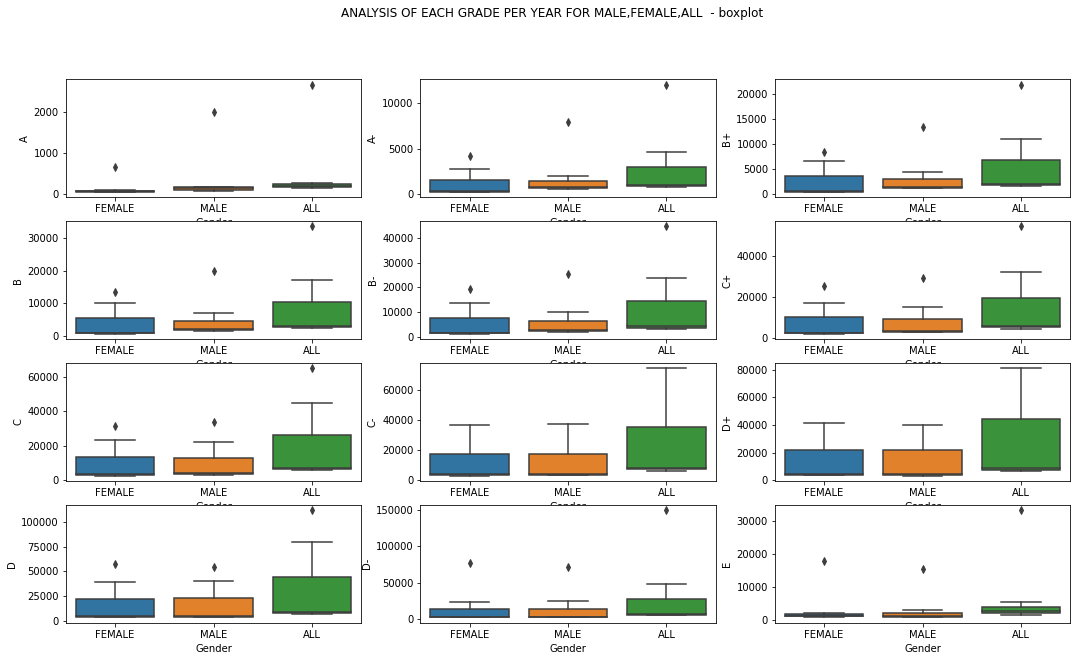

In [91]:
fig, axes = plt.subplots(4, 3, figsize=(18, 10))

fig.suptitle('ANALYSIS OF EACH GRADE PER YEAR FOR MALE,FEMALE,ALL  - boxplot')

sns.boxplot(ax=axes[0, 0],x='Gender',y='A',data=ndf )
sns.boxplot(ax=axes[0, 1],x='Gender',y='A-',data=ndf )
sns.boxplot(ax=axes[0, 2],x='Gender',y='B+',data=ndf )
sns.boxplot(ax=axes[1, 0],x='Gender',y='B',data=ndf )
sns.boxplot(ax=axes[1, 1],x='Gender',y='B-',data=ndf )
sns.boxplot(ax=axes[1, 2],x='Gender',y='C+',data=ndf )
sns.boxplot(ax=axes[2, 0],x='Gender',y='C',data=ndf )
sns.boxplot(ax=axes[2, 1],x='Gender',y='C-',data=ndf )
sns.boxplot(ax=axes[2, 2],x='Gender',y='D+',data=ndf )
sns.boxplot(ax=axes[3, 0],x='Gender',y='D',data=ndf )
sns.boxplot(ax=axes[3, 1],x='Gender',y='D-',data=ndf )
sns.boxplot(ax=axes[3, 2],x='Gender',y='E',data=ndf )

From the boxplot and barplot,the year 2015 stands out in terms of very high upper scores and fewer low scores  
This is consistent with the high leakage results seen in 2016  
  
The year 2016,saw the significant change from 2015.The high grades are fewer ,and we have more low scores  
The year 2016 had tighter rules on exam cheating and there was a change of leadership in the ministry of education which came with more stringent rules on national exams rollout  






In [98]:
ndf_2= ndf.groupby(['Gender','Year'])[ndf.columns].sum()

In [99]:
ndf_2

A     A-     B+      B     B-     C+      C     C-     D+  \
Gender Year                                                                 
ALL    2006   217    880   1641   2399   3342   4442   5538   6492   6937   
       2007   160    754   1632   2605   3607   4971   6179   7048   7538   
       2008   168    972   2009   2877   3886   5101   6409   7442   8024   
       2009   196    846   1989   3098   4355   5699   7040   8243   8849   
       2010   279   1236   2531   3677   4969   6361   7805   8925   9438   
       2015  2685  12069  21927  33460  44581  54770  64913  74115  79157   
       2016   141   4645  10975  17216  23745  32207  44792  61026  80951   
FEMALE 2006    69    242    446    772   1234   1873   2554   3193   3519   
       2007    50    191    473    844   1339   2100   2865   3439   3817   
       2008    66    274    596    920   1417   2129   2946   3618   4043   
       2009    58    218    553    974   1572   2388   3216   3996   4447   
       2010    97    344    744   1219   1875   2722   3637   4389   4734   
       2015   661   4117   8410  13634  19269  25214  31476  36633  38976   
       2016    58   2685   6581  10204  13649  17238  22960  30979  41632   
MALE   2006   148    638   1195   1627   2108   2569   2984   3299   3418   
       2007   110    563   1159   1761   2268   2871   3314   3609   3721   
       2008   102    698   1413   1957   2469   2972   3463   3824   3981   
       2009   138    628   1436   2124   2783   3311   3824   4247   4402   
       2010   182    892   1787   2458   3094   3639   4168   4536   4704   
       2015  2024   7952  13517  19826  25312  29556  33437  37482  40181   
       2016    83   1960   4394   7012  10096  14969  21832  30047  39319   

                  D      D-      E  
Gender Year                         
ALL    2006    6804    5544   1731  
       2007    7223    5686   1569  
       2008    8092    6993   2755  
       2009    8850    7503   2583  
       2010    9330    7788   2610  
       2015   79555   48658   5350  
       2016  112135  149929  33329  
FEMALE 2006    3513    2909    897  
       2007    3730    2924    790  
       2008    4150    3593   1376  
       2009    4514    3897   1326  
       2010    4769    4012   1304  
       2015   39113   23127   2223  
       2016   57487   77718  18007  
MALE   2006    3291    2635    834  
       2007    3493    2762    779  
       2008    3942    3400   1379  
       2009    4336    3606   1257  
       2010    4561    3776   1306  
       2015   40442   25531   3127  
       2016   54648   72211  15322

In [100]:
ndf_2["sum"] = ndf_2.sum(axis=1)
ndf_2

A     A-     B+      B     B-     C+      C     C-     D+  \
Gender Year                                                                 
ALL    2006   217    880   1641   2399   3342   4442   5538   6492   6937   
       2007   160    754   1632   2605   3607   4971   6179   7048   7538   
       2008   168    972   2009   2877   3886   5101   6409   7442   8024   
       2009   196    846   1989   3098   4355   5699   7040   8243   8849   
       2010   279   1236   2531   3677   4969   6361   7805   8925   9438   
       2015  2685  12069  21927  33460  44581  54770  64913  74115  79157   
       2016   141   4645  10975  17216  23745  32207  44792  61026  80951   
FEMALE 2006    69    242    446    772   1234   1873   2554   3193   3519   
       2007    50    191    473    844   1339   2100   2865   3439   3817   
       2008    66    274    596    920   1417   2129   2946   3618   4043   
       2009    58    218    553    974   1572   2388   3216   3996   4447   
       2010    97    344    744   1219   1875   2722   3637   4389   4734   
       2015   661   4117   8410  13634  19269  25214  31476  36633  38976   
       2016    58   2685   6581  10204  13649  17238  22960  30979  41632   
MALE   2006   148    638   1195   1627   2108   2569   2984   3299   3418   
       2007   110    563   1159   1761   2268   2871   3314   3609   3721   
       2008   102    698   1413   1957   2469   2972   3463   3824   3981   
       2009   138    628   1436   2124   2783   3311   3824   4247   4402   
       2010   182    892   1787   2458   3094   3639   4168   4536   4704   
       2015  2024   7952  13517  19826  25312  29556  33437  37482  40181   
       2016    83   1960   4394   7012  10096  14969  21832  30047  39319   

                  D      D-      E     sum  
Gender Year                                 
ALL    2006    6804    5544   1731   45967  
       2007    7223    5686   1569   48972  
       2008    8092    6993   2755   54728  
       2009    8850    7503   2583   59251  
       2010    9330    7788   2610   64949  
       2015   79555   48658   5350  521240  
       2016  112135  149929  33329  571091  
FEMALE 2006    3513    2909    897   21221  
       2007    3730    2924    790   22562  
       2008    4150    3593   1376   25128  
       2009    4514    3897   1326   27159  
       2010    4769    4012   1304   29846  
       2015   39113   23127   2223  242853  
       2016   57487   77718  18007  299198  
MALE   2006    3291    2635    834   24746  
       2007    3493    2762    779   26410  
       2008    3942    3400   1379   29600  
       2009    4336    3606   1257   32092  
       2010    4561    3776   1306   35103  
       2015   40442   25531   3127  278387  
       2016   54648   72211  15322  271893

No. of All students sitting for their exams increased thoughout the years from 2006 to 2016  

No. of FEMALE students increased through the years   

No. of MALLE students increased also but between 2015 and 2016 the number reduced by 6494